In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

import scipy.stats as stats


In [12]:
ROOT_BINARY = "Sampling/binary"
ROOT_BINARY_ALFLEX = "Sampling/binary_alflex"
FILENAME = "am.csv"

PATH_BINARY = os.path.join(ROOT_BINARY, FILENAME)
PATH_BINARY_ALFLEX = os.path.join(ROOT_BINARY_ALFLEX, FILENAME)

IS_SMOTE = False

# Read File

In [13]:
dataset = pd.read_csv(PATH_BINARY_ALFLEX) # change the path here to choose from milking only dataset or milking + alflex

try:
    dataset = dataset.drop('Unnamed: 0', axis=1)
except:
    pass

try:
    dataset = dataset.drop('CowID', axis=1)
except:
    pass

try:
    dataset = dataset.drop('Date', axis=1)
except:
    pass

try:
    dataset = dataset.drop('MilkDate', axis=1)
except:
    pass

dataset

,Duration,Milk,PFlow,Mastitis,DIM,Mean_Milk,Std_Milk,Mean_Duration,Std_Duration,Mean_Flow,...,Activity,Rumination,Min_Activity,Min_Rumination,Max_Activity,Max_Rumination,Mean_Activity,Std_Activity,Mean_Rumination,Std_Rumination
0,6.88,14.15,3.1,0.0,173,13.498,0.690703,6.804,0.322614,2.88,...,39.375000,45.250000,24.0,9.0,54.0,73.0,40.952879,1.220856e+00,42.199394,2.838007
1,6.63,13.59,3.1,0.0,174,13.708,0.441158,6.864,0.225788,2.94,...,42.636364,36.454545,25.0,4.0,67.0,61.0,40.963485,1.238662e+00,40.940303,3.774609
2,6.70,13.14,2.8,0.0,175,13.518,0.440080,6.774,0.164712,2.90,...,41.375000,44.750000,26.0,31.0,64.0,58.0,40.971818,1.241908e+00,41.823636,4.099838
3,6.45,13.01,3.1,0.0,176,13.508,0.453453,6.662,0.154175,3.00,...,42.000000,38.500000,26.0,4.0,62.0,63.0,41.331818,1.222988e+00,40.663636,4.044158
4,6.81,11.97,2.8,0.0,177,13.172,0.806734,6.694,0.167123,2.98,...,41.142857,37.428571,25.0,20.0,57.0,56.0,41.305844,1.225932e+00,40.476623,4.195880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,5.03,13.58,5.2,0.0,60,14.386,0.658164,4.786,0.364870,5.04,...,43.583333,35.250000,25.0,1.0,71.0,72.0,42.990000,2.047783e+00,39.000000,4.057555
45403,4.96,15.99,4.8,0.0,61,14.734,0.959364,4.876,0.333961,4.90,...,43.583333,35.250000,25.0,1.0,71.0,72.0,43.790000,7.616320e-01,37.050000,2.495245
45404,4.70,15.56,5.2,0.0,62,15.046,0.913554,4.956,0.168315,4.94,...,43.583333,35.250000,25.0,1.0,71.0,72.0,43.886667,6.782740e-01,36.260000,2.258429
45405,5.13,15.17,4.9,0.0,63,15.096,0.911773,4.950,0.159531,4.94,...,43.583333,35.250000,25.0,1.0,71.0,72.0,43.583333,4.562530e-07,35.250000,0.000000


# QQ Plot to detect outlier

In [14]:
# print("Original shape:", dataset.shape)

# # Create Q-Q plots for each numerical variable
# for column in dataset.columns:
#     if dataset[column].dtype in [np.float64, np.int64]:
#         plt.figure(figsize=(8, 4))
#         stats.probplot(dataset[column], dist="norm", plot=plt)
#         plt.title(f'Q-Q Plot for {column}')
#         # plt.show()

# # Remove outliers based on a threshold (e.g., 3 standard deviations)
# threshold = 3
# dataset = dataset[(np.abs(stats.zscore(dataset)) < threshold).all(axis=1)]

# print("Shape after removing outliers:", dataset.shape)

# SMOTE

In [15]:
X = dataset.drop(columns=['Mastitis'])
y = dataset['Mastitis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)  # 可以調整的參數：sampling_strategy, k_neighbors
X_train, y_train = smote.fit_resample(X_train, y_train)

# Random Forest

In [16]:
# initialize random forest
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=653, max_depth=6)  # Hyper-parameters：n_estimators, max_depth, min_samples_split, min_samples_leaf

# train model
rf_classifier.fit(X_train, y_train)

# predict
y_pred = rf_classifier.predict(X_test)

# print report
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# predict on original data
predictions = rf_classifier.predict(X)
dataset["Mastitis_Pred"] = predictions

dataset

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      9038
         1.0       0.02      0.50      0.04        44

    accuracy                           0.88      9082
   macro avg       0.51      0.69      0.49      9082
weighted avg       0.99      0.88      0.93      9082

Accuracy: 0.8810834617925567


,Duration,Milk,PFlow,Mastitis,DIM,Mean_Milk,Std_Milk,Mean_Duration,Std_Duration,Mean_Flow,...,Rumination,Min_Activity,Min_Rumination,Max_Activity,Max_Rumination,Mean_Activity,Std_Activity,Mean_Rumination,Std_Rumination,Mastitis_Pred
0,6.88,14.15,3.1,0.0,173,13.498,0.690703,6.804,0.322614,2.88,...,45.250000,24.0,9.0,54.0,73.0,40.952879,1.220856e+00,42.199394,2.838007,0.0
1,6.63,13.59,3.1,0.0,174,13.708,0.441158,6.864,0.225788,2.94,...,36.454545,25.0,4.0,67.0,61.0,40.963485,1.238662e+00,40.940303,3.774609,0.0
2,6.70,13.14,2.8,0.0,175,13.518,0.440080,6.774,0.164712,2.90,...,44.750000,26.0,31.0,64.0,58.0,40.971818,1.241908e+00,41.823636,4.099838,0.0
3,6.45,13.01,3.1,0.0,176,13.508,0.453453,6.662,0.154175,3.00,...,38.500000,26.0,4.0,62.0,63.0,41.331818,1.222988e+00,40.663636,4.044158,0.0
4,6.81,11.97,2.8,0.0,177,13.172,0.806734,6.694,0.167123,2.98,...,37.428571,25.0,20.0,57.0,56.0,41.305844,1.225932e+00,40.476623,4.195880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,5.03,13.58,5.2,0.0,60,14.386,0.658164,4.786,0.364870,5.04,...,35.250000,25.0,1.0,71.0,72.0,42.990000,2.047783e+00,39.000000,4.057555,0.0
45403,4.96,15.99,4.8,0.0,61,14.734,0.959364,4.876,0.333961,4.90,...,35.250000,25.0,1.0,71.0,72.0,43.790000,7.616320e-01,37.050000,2.495245,0.0
45404,4.70,15.56,5.2,0.0,62,15.046,0.913554,4.956,0.168315,4.94,...,35.250000,25.0,1.0,71.0,72.0,43.886667,6.782740e-01,36.260000,2.258429,0.0
45405,5.13,15.17,4.9,0.0,63,15.096,0.911773,4.950,0.159531,4.94,...,35.250000,25.0,1.0,71.0,72.0,43.583333,4.562530e-07,35.250000,0.000000,0.0


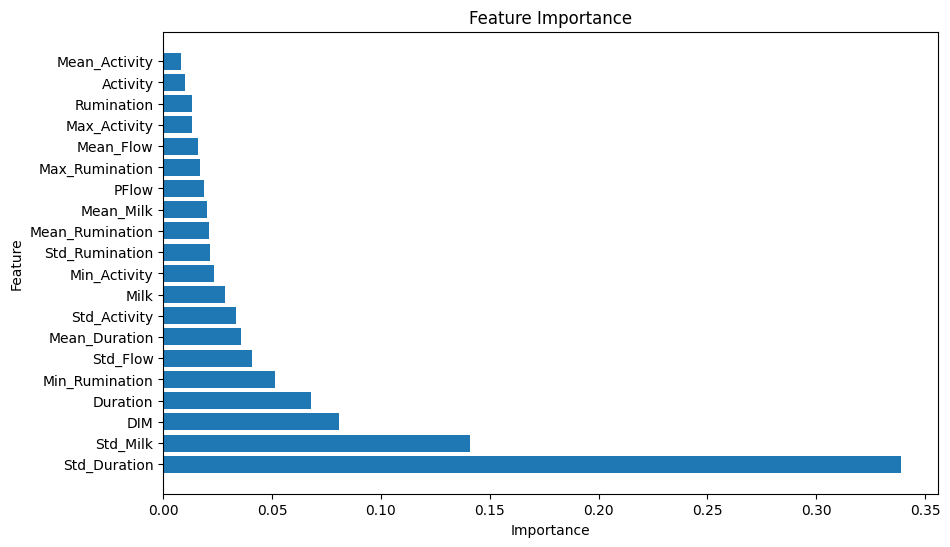

In [17]:
# get feature importance
feature_importance = rf_classifier.feature_importances_

# get feature name
features = X.columns

# create a dataframe to store importance value
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# sort by importance value
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot histogram
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
